In [61]:
import sys
from pathlib import Path

# Notebook cell
%load_ext autoreload
%autoreload 2

# Get root directory (assuming notebook is in root/notebooks/)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR

# Add src directory to Python path
sys.path.append(str(ROOT_DIR / 'src'))

# Verify path
print(f"Python will look in these locations:\n{sys.path}")


# --- Execute the processor ---
import utils
from config import date_str, DOWNLOAD_DIR, DEST_DIR

print(f'date_str: {date_str}')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python will look in these locations:
['C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\python311.zip', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\DLLs', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\Lib', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv', '', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\setuptools\\_vendor', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src', 'c:\\Users\\ping\\Files_w

In [62]:
# Override date_str for testing
# date_str = '2025-04-14'

In [63]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
pd.set_option('display.width', 1000)        # Let the display adjust to the window
# pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 200)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [64]:
zscore_df = pd.read_parquet(f'..\data\{date_str}_zscore_df.parquet', engine='pyarrow')
cluster_stats_df = pd.read_parquet(f'..\data\{date_str}_cluster_stats_df.parquet', engine='pyarrow')
detailed_clusters_df = pd.read_parquet(f'..\data\{date_str}_detailed_clusters_df.parquet', engine='pyarrow')
df_data = pd.read_parquet(f'..\data\{date_str}_df_finviz_merged.parquet', engine='pyarrow')

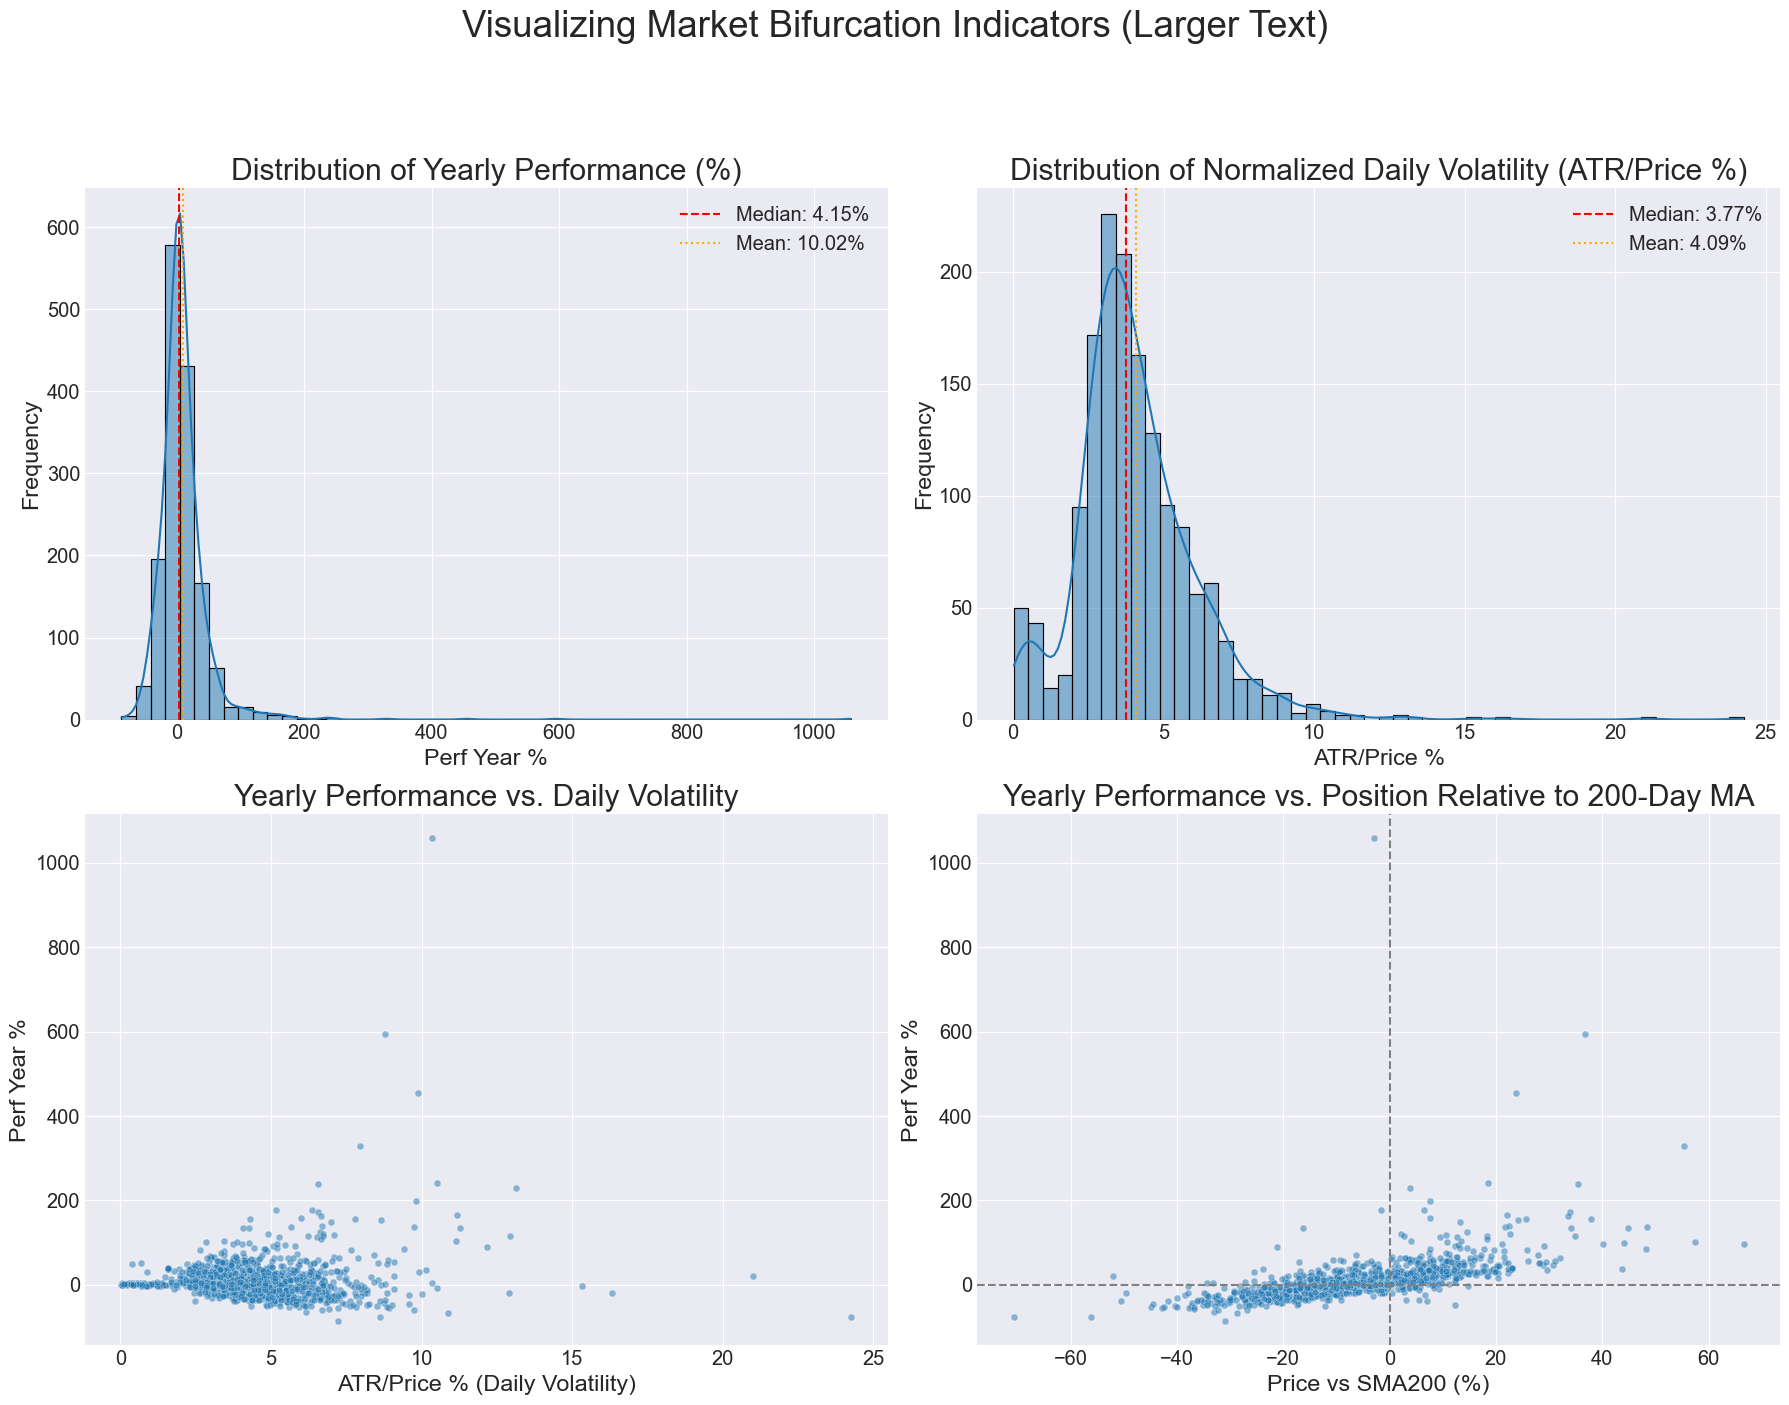

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Will be used if we need to handle potential infinite values if any

# --- IMPORTANT ---
# Ensure your DataFrame is named df_data and contains the columns used below.
# Example: (replace this with your actual data loading)
# df_data = pd.read_csv('your_market_data.csv')

# --- Data Cleaning (Optional but Recommended) ---
# Replace potential infinite values with NaN
df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use a copy to avoid modifying original if needed later
df_plot = df_data.copy()

# --- Font Size Definitions ---
SCALE_FONTSIZE = 1.2  # Scale factor for font sizes
TITLE_FONTSIZE = 18 * SCALE_FONTSIZE
AXIS_LABEL_FONTSIZE = 14 * SCALE_FONTSIZE
TICK_LABEL_FONTSIZE = 12 * SCALE_FONTSIZE
LEGEND_FONTSIZE = 12 * SCALE_FONTSIZE
SUPTITLE_FONTSIZE = 22 * SCALE_FONTSIZE

# --- Visualization ---

plt.style.use('seaborn-v0_8-darkgrid') # Use a visually appealing style
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Increased figure size slightly for larger text
fig.suptitle('Visualizing Market Bifurcation Indicators (Larger Text)', fontsize=SUPTITLE_FONTSIZE, y=1.03) # Adjusted y position slightly

# 1. Histogram of Yearly Performance ('Perf Year %')
sns.histplot(data=df_plot, x='Perf Year %', kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of Yearly Performance (%)', fontsize=TITLE_FONTSIZE)
axes[0, 0].set_xlabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['Perf Year %'].median()
mean_val = df_plot['Perf Year %'].mean()
axes[0, 0].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 0].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 0].legend(fontsize=LEGEND_FONTSIZE)

# 2. Histogram of Normalized Volatility ('ATR/Price %')
sns.histplot(data=df_plot, x='ATR/Price %', kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribution of Normalized Daily Volatility (ATR/Price %)', fontsize=TITLE_FONTSIZE)
axes[0, 1].set_xlabel('ATR/Price %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['ATR/Price %'].median()
mean_val = df_plot['ATR/Price %'].mean()
axes[0, 1].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 1].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 1].legend(fontsize=LEGEND_FONTSIZE)

# 3. Scatter Plot: Yearly Performance vs. Normalized Volatility
sns.scatterplot(data=df_plot, x='ATR/Price %', y='Perf Year %', ax=axes[1, 0], alpha=0.5, s=25) # Slightly larger points
axes[1, 0].set_title('Yearly Performance vs. Daily Volatility', fontsize=TITLE_FONTSIZE)
axes[1, 0].set_xlabel('ATR/Price % (Daily Volatility)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

# 4. Scatter Plot: Yearly Performance vs. Distance from 200-Day MA
sns.scatterplot(data=df_plot, x='SMA200 %', y='Perf Year %', ax=axes[1, 1], alpha=0.5, s=25) # Slightly larger points
axes[1, 1].set_title('Yearly Performance vs. Position Relative to 200-Day MA', fontsize=TITLE_FONTSIZE)
axes[1, 1].set_xlabel('Price vs SMA200 (%)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
axes[1, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA200)
axes[1, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Year

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout slightly for suptitle
plt.show()

In [66]:
detailed_clusters_df

,Cluster_ID,Ticker,Raw_Score,Risk_Adj_Score,Volatility,Price,"MktCap AUM, M"
147,1,FLOT,0.7490,186.3888,0.0040,50.7600,8800.0000
33,1,LNG,1.3665,44.2172,0.0309,231.4500,51570.0000
99,1,EQT,0.8919,29.0666,0.0307,50.9800,30460.0000
141,1,EXE,0.7577,28.9311,0.0262,106.4900,24780.0000
188,1,WMB,0.6206,27.4544,0.0226,58.6200,71560.0000
...,...,...,...,...,...,...,...
206,60,BNS,0.5713,32.7277,0.0175,47.4700,59130.0000
273,60,DEO,0.4458,22.8907,0.0195,109.5800,60880.0000
535,60,ELS,0.0029,0.1779,0.0165,65.3200,13080.0000
540,60,HR,-0.0061,-0.3265,0.0186,16.0000,5620.0000


In [67]:
import pandas as pd # Assuming pandas is used

def select_stocks_from_clusters(cluster_stats_df, detailed_clusters_df,
                                select_top_n_clusters=3, max_selection_per_cluster=5,
                                min_cluster_size=5, penalty_IntraCluster_Corr=0.3,
                                date_str=date_str,
                                min_raw_score=None, # <-- Added argument
                                min_risk_adj_score=None): # <-- Added argument
    """
    Pipeline to select stocks from better performing clusters, with optional score thresholds.

    Parameters:
    - cluster_stats_df: DataFrame with cluster statistics.
    - detailed_clusters_df: DataFrame with detailed cluster information including
                            'Ticker', 'Cluster_ID', 'Raw_Score', 'Risk_Adj_Score', etc.
    - select_top_n_clusters: int, Number of top clusters to select (default=3).
    - max_selection_per_cluster: int, Max number of stocks to select from each cluster (default=5).
    - min_cluster_size: int, Minimum size for a cluster to be considered (default=5).
    - penalty_IntraCluster_Corr: float, Penalty weight for intra-cluster correlation in
                                     composite score (default=0.3).
    - date_str: str, Date string for tracking/parameter storage.
    - min_raw_score: float, optional (default=None)
        Minimum Raw_Score required for a stock to be considered for selection.
        If None, no threshold is applied based on Raw_Score.
    - min_risk_adj_score: float, optional (default=None)
        Minimum Risk_Adj_Score required for a stock to be considered for selection.
        If None, no threshold is applied based on Risk_Adj_Score.

    Returns:
    - dict: A dictionary containing:
        - 'selected_top_n_cluster_ids': List of top selected cluster IDs.
        - 'selected_stocks': DataFrame of selected stocks.
        - 'cluster_performance': DataFrame of selected cluster metrics.
        - 'parameters': Dictionary of the input parameters used.
    """

    # Store input parameters
    parameters = {
        'date_str': date_str,
        'select_top_n_clusters': select_top_n_clusters,
        'max_selection_per_cluster': max_selection_per_cluster,
        'min_cluster_size': min_cluster_size,
        'min_raw_score': min_raw_score,         # <-- Stored parameter
        'min_risk_adj_score': min_risk_adj_score, # <-- Stored parameter
        'penalty_IntraCluster_Corr': penalty_IntraCluster_Corr,
    }
    
    # ===== 1. Filter and Rank Clusters =====
    qualified_clusters = cluster_stats_df[cluster_stats_df['Size'] >= min_cluster_size].copy()
    if qualified_clusters.empty:
        print(f"Warning: No clusters met the minimum size criteria ({min_cluster_size}).")
        return {
            'selected_stocks': pd.DataFrame(),
            'cluster_performance': pd.DataFrame(),
            'parameters': parameters
        }

    qualified_clusters['Composite_Cluster_Score'] = (
        (1 - penalty_IntraCluster_Corr) * qualified_clusters['Avg_Raw_Score'] +
        penalty_IntraCluster_Corr * (1 - qualified_clusters['Avg_IntraCluster_Corr'])
    )
    ranked_clusters = qualified_clusters.sort_values('Composite_Cluster_Score', ascending=False)
    selected_clusters = ranked_clusters.head(select_top_n_clusters)
    cluster_ids = selected_clusters['Cluster_ID'].tolist()

    if not cluster_ids:
        print("Warning: No clusters were selected based on ranking.")
        return {
            'selected_stocks': pd.DataFrame(),
            'cluster_performance': selected_clusters, # Return empty selected clusters df
            'parameters': parameters
        }


    # ===== 2. Select Stocks from Each Cluster =====
    selected_stocks_list = []
    for cluster_id in cluster_ids:
        # Get all stocks for the current cluster
        cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id].copy()

        # ===> Apply Threshold Filters <===
        if min_raw_score is not None:
            cluster_stocks = cluster_stocks[cluster_stocks['Raw_Score'] >= min_raw_score]
        if min_risk_adj_score is not None:
            cluster_stocks = cluster_stocks[cluster_stocks['Risk_Adj_Score'] >= min_risk_adj_score]
        # ===> End of Added Filters <===

        # Proceed only if stocks remain after filtering
        if len(cluster_stocks) > 0:
            # Sort remaining stocks by Risk_Adj_Score and select top N
            top_stocks = cluster_stocks.sort_values('Risk_Adj_Score', ascending=False).head(max_selection_per_cluster)

            # Add cluster-level metrics to the selected stock rows
            cluster_metrics = selected_clusters[selected_clusters['Cluster_ID'] == cluster_id].iloc[0]
            for col in ['Composite_Cluster_Score', 'Avg_IntraCluster_Corr', 'Avg_Volatility',
                      'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Size']: # Added Size for context
                # Use .get() for safety if a column might be missing
                top_stocks[f'Cluster_{col}'] = cluster_metrics.get(col, None)
            selected_stocks_list.append(top_stocks)

    # Consolidate selected stocks
    if selected_stocks_list:
        selected_stocks = pd.concat(selected_stocks_list)
        # Recalculate weights based on the final selection
        if selected_stocks['Risk_Adj_Score'].sum() != 0:
             selected_stocks['Weight'] = (selected_stocks['Risk_Adj_Score'] /
                                          selected_stocks['Risk_Adj_Score'].sum())
        else:
             # Handle case where all selected scores are zero (unlikely but possible)
             selected_stocks['Weight'] = 1 / len(selected_stocks) if len(selected_stocks) > 0 else 0

        selected_stocks = selected_stocks.sort_values(['Cluster_ID', 'Risk_Adj_Score'],
                                                    ascending=[True, False])
    else:
        selected_stocks = pd.DataFrame()
        print("Warning: No stocks met selection criteria (including score thresholds if applied).")


    # ===== 3. Prepare Enhanced Output Reports =====
    cluster_performance = selected_clusters.copy()
    # Calculate how many stocks were actually selected per cluster after filtering
    cluster_performance['Stocks_Selected'] = cluster_performance['Cluster_ID'].apply(
        lambda x: len(selected_stocks[selected_stocks['Cluster_ID'] == x]) if not selected_stocks.empty else 0)

    if not selected_stocks.empty:
         # Ensure Avg_IntraCluster_Corr exists before calculating diversification
        if 'Avg_IntraCluster_Corr' in cluster_performance.columns:
             cluster_performance['Intra_Cluster_Diversification'] = 1 - cluster_performance['Avg_IntraCluster_Corr']
        else:
             cluster_performance['Intra_Cluster_Diversification'] = pd.NA # Or None
    else:
      # Handle case where selected_stocks is empty
        cluster_performance['Intra_Cluster_Diversification'] = pd.NA # Or None

    # ===> Package results and parameters
    results_bundle = {
        'selected_top_n_cluster_ids': cluster_ids,
        'selected_stocks': selected_stocks,
        'cluster_performance': cluster_performance,
        'parameters': parameters
    }

    return results_bundle



In [68]:
import pandas as pd
from typing import Dict, Any

def print_stock_selection_report(output: Dict[str, Any]) -> None:
    """
    Prints a detailed report summarizing the results of the stock selection process,
    extracting all necessary information from the output dictionary.

    Args:
        output (Dict[str, Any]): The dictionary returned by the
                                 select_stocks_from_clusters function, containing:
                                 - 'selected_stocks': DataFrame of selected stocks.
                                 - 'cluster_performance': DataFrame of selected cluster metrics.
                                #  - 'parameters': Dictionary of the input parameters used.
                                #  - 'cluster_stats_df': Original cluster stats DataFrame.
                                #  - 'detailed_clusters_df': Original detailed clusters DataFrame.
    Returns:
        None: This function prints output to the console.
    """
    # Extract data from the output dictionary using .get() for safety
    selected_stocks = output.get('selected_stocks', pd.DataFrame())
    cluster_performance = output.get('cluster_performance', pd.DataFrame())
    used_params = output.get('parameters', {})
    # Extract the input DataFrames needed for the report
    # cluster_stats_df = output.get('input_cluster_stats_df') # Might be None
    cluster_stats_df = output.get('cluster_stats_df') # Might be None
    # detailed_clusters_df = output.get('input_detailed_clusters_df') # Might be None
    detailed_clusters_df = output.get('detailed_clusters_df') # Might be None

    # --- Start of Original Code Block (adapted) ---

    print("\n=== CLUSTER SELECTION CRITERIA ===")
    print("* Using Composite_Cluster_Score (balancing Raw Score and diversification) for cluster ranking.")
    print("* Using Risk_Adj_Score for stock selection within clusters.")

    num_selected_clusters = len(cluster_performance) if not cluster_performance.empty else 0
    # Use the extracted cluster_stats_df
    total_clusters = len(cluster_stats_df) if cluster_stats_df is not None and not cluster_stats_df.empty else 'N/A'

    print(f"* Selected top {num_selected_clusters} clusters from {total_clusters} total initial clusters.") # Adjusted wording slightly
    print(f"* Selection Criteria:")
    if used_params:
        for key, value in used_params.items():
            # Avoid printing the large input dataframes stored in parameters if they were added there too
            if not isinstance(value, pd.DataFrame):
                 print(f"    {key}: {value}")
    else:
        print("    Parameters not available.")


    if not cluster_performance.empty:
        print("\n=== SELECTED CLUSTERS (RANKED BY COMPOSITE SCORE) ===")
        display_cols_exist = [col for col in [
                                'Cluster_ID', 'Size', 'Avg_Raw_Score', 'Avg_Risk_Adj_Score',
                                'Avg_IntraCluster_Corr', 'Avg_Volatility', 'Composite_Cluster_Score',
                                'Stocks_Selected', 'Intra_Cluster_Diversification']
                              if col in cluster_performance.columns]
        print(cluster_performance[display_cols_exist].sort_values('Composite_Cluster_Score', ascending=False).to_string(index=False))

        # Print top 8 stocks by Raw_Score for each selected cluster
        # Check if detailed_clusters_df was successfully extracted
        if detailed_clusters_df is not None and not detailed_clusters_df.empty:
            print("\n=== TOP STOCKS BY RAW SCORE PER SELECTED CLUSTER ===")
            print("""* Volatility is the standard deviation of daily returns over the past 250 trading days (example context).
* Note: The stocks below are shown ranked by Raw_Score for analysis,
*       but actual selection within the cluster was based on Risk_Adj_Score.""")

            for cluster_id in cluster_performance['Cluster_ID']:
                 cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
                 if not cluster_stocks.empty:
                    required_cols = ['Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility']
                    if all(col in cluster_stocks.columns for col in required_cols):
                        top_raw = cluster_stocks.nlargest(8, 'Raw_Score')[required_cols]

                        print(f"\nCluster {cluster_id} - Top 8 by Raw Score:")
                        print(top_raw.to_string(index=False))
                        cluster_avg_raw = cluster_performance.loc[cluster_performance['Cluster_ID'] == cluster_id, 'Avg_Raw_Score'].values
                        cluster_avg_risk = cluster_performance.loc[cluster_performance['Cluster_ID'] == cluster_id, 'Avg_Risk_Adj_Score'].values
                        if len(cluster_avg_raw) > 0: print(f"Cluster Avg Raw Score: {cluster_avg_raw[0]:.2f}")
                        if len(cluster_avg_risk) > 0: print(f"Cluster Avg Risk Adj Score: {cluster_avg_risk[0]:.2f}")
                    else:
                        print(f"\nCluster {cluster_id} - Missing required columns in detailed_clusters_df to show top stocks.")
                 else:
                     print(f"\nCluster {cluster_id} - No stocks found in detailed_clusters_df for this cluster.")
        else:
            print("\n=== TOP STOCKS BY RAW SCORE PER SELECTED CLUSTER ===")
            print("Skipping - Detailed cluster information ('input_detailed_clusters_df') not found in the output dictionary.")

    else:
        print("\n=== SELECTED CLUSTERS ===")
        print("No clusters were selected based on the criteria.")


    print(f"\n=== FINAL SELECTED STOCKS (FILTERED & WEIGHTED) ===")
    if not selected_stocks.empty:
        print("* Stocks actually selected based on Risk_Adj_Score (and optional thresholds) within each cluster.")
        print("* Position weights assigned based on Risk_Adj_Score within the final selected portfolio.")

        desired_cols = ['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score',
                        'Volatility', 'Weight',
                        'Cluster_Avg_Raw_Score', 'Cluster_Avg_Risk_Adj_Score']
        available_cols = [col for col in desired_cols if col in selected_stocks.columns]
        print(selected_stocks[available_cols].sort_values(['Cluster_ID', 'Risk_Adj_Score'],
                                                        ascending=[True, False]).to_string(index=False))

        print("\n=== PORTFOLIO SUMMARY ===")
        print(f"Total Stocks Selected: {len(selected_stocks)}")
        print(f"Average Raw Score: {selected_stocks.get('Raw_Score', pd.Series(dtype=float)).mean():.2f}")
        print(f"Average Risk-Adjusted Score: {selected_stocks.get('Risk_Adj_Score', pd.Series(dtype=float)).mean():.2f}")
        print(f"Average Volatility: {selected_stocks.get('Volatility', pd.Series(dtype=float)).mean():.2f}")
        print(f"Total Weight (should be close to 1.0): {selected_stocks.get('Weight', pd.Series(dtype=float)).sum():.4f}")
        print("\nCluster Distribution:")
        print(selected_stocks['Cluster_ID'].value_counts().to_string())
    else:
        print("No stocks were selected after applying all filters and criteria.")


In [69]:
# --- Fixed Parameters ---
select_top_n_clusters = 10
max_selection_per_cluster = 2
min_cluster_size = 3  # prevent extreme high risk adj scores
penalty_IntraCluster_Corr = 0
min_raw_score = 2.0 
min_risk_adj_score = 100.0 

output = select_stocks_from_clusters(
    cluster_stats_df=cluster_stats_df,
    detailed_clusters_df=detailed_clusters_df,
    select_top_n_clusters=select_top_n_clusters,
    max_selection_per_cluster=max_selection_per_cluster,
    min_cluster_size=min_cluster_size,
    penalty_IntraCluster_Corr=penalty_IntraCluster_Corr,
    min_raw_score=min_raw_score,
    min_risk_adj_score=min_risk_adj_score,
    date_str=date_str # Pass the date
)

In [70]:
import pandas as pd # Import pandas if you're expecting DataFrames/Series

print("--- Printing Keys and Values in output dictionary ---")
for key, value in output.items():
    print(f"Key: {key}")
    if isinstance(value, (pd.DataFrame, pd.Series)):
        print(f"Value (first 5 rows/elements):\n{value.head()}\n")
    elif isinstance(value, dict):
        print(f"Value (is a dictionary):\n{value}\n")
    else:
        print(f"Value:\n{value}\n")


--- Printing Keys and Values in output dictionary ---
Key: selected_top_n_cluster_ids
Value:
[39, 5, 59, 44, 55, 60, 45, 46, 32, 53]

Key: selected_stocks
Value (first 5 rows/elements):
   Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility   Price  MktCap AUM, M  Cluster_Composite_Cluster_Score  Cluster_Avg_IntraCluster_Corr  Cluster_Avg_Volatility  Cluster_Avg_Raw_Score  Cluster_Avg_Risk_Adj_Score  Cluster_Size  Weight
5           5    IBN     2.0380        124.1324      0.0164 33.2200    118300.0000                           1.3785                         0.8010                  0.0295                 1.3785                     66.6239        4.0000  0.3260
6           5    HDB     2.0111        107.8880      0.0186 72.0400    183770.0000                           1.3785                         0.8010                  0.0295                 1.3785                     66.6239        4.0000  0.2833
0          60    HRB     2.5675        148.7565      0.0173 63.0400      8440.0000

In [71]:
selected_top_n_cluster_ids= output['selected_top_n_cluster_ids']
print(f'selected_top_{select_top_n_clusters}_cluster_ids: {selected_top_n_cluster_ids}')


selected_top_10_cluster_ids: [39, 5, 59, 44, 55, 60, 45, 46, 32, 53]


In [72]:
import pandas as pd
import io # Needed for capturing string output if needed

print(f'====== Clusters picked by select_stocks_from_clusters ======')

# --- Parameters ---
num_clusters_to_process = 10
n_rows_per_cluster = 5
sort_column = 'Risk_Adj_Score'
ascending_sort = False
# --- End Parameters ---


# 1. Select only the first 'num_clusters_to_process' from the full list
if num_clusters_to_process <= 0:
    print("Number of clusters to process must be positive.")
    clusters_to_process = []
elif num_clusters_to_process >= len(selected_top_n_cluster_ids):
     print(f"Processing all {len(selected_top_n_cluster_ids)} clusters from the list.")
     clusters_to_process = selected_top_n_cluster_ids
else:
    clusters_to_process = selected_top_n_cluster_ids[:num_clusters_to_process]
    print(f"Processing the first {num_clusters_to_process} clusters: {clusters_to_process}")


# Proceed only if there are clusters to process
if clusters_to_process:

    # 2. Filter the DataFrame
    filtered_df = detailed_clusters_df[
        detailed_clusters_df['Cluster_ID'].isin(clusters_to_process)
    ].copy()

    if filtered_df.empty:
        print(f"\nNo rows found for the selected Cluster_IDs: {clusters_to_process}")
    else:
        # 3. Convert to ordered categorical
        filtered_df['Cluster_ID'] = pd.Categorical(
            filtered_df['Cluster_ID'],
            categories=clusters_to_process,
            ordered=True
        )

        # --- Method 1: Sort then Head ---
        # print("\n--- Method 1: Sort then Head ---")
        sorted_df = filtered_df.sort_values(
            by=['Cluster_ID', sort_column],
            ascending=[True, ascending_sort]
        )
        top_n_per_cluster_df = sorted_df.groupby(
            'Cluster_ID',
            observed=True,
            group_keys=False
        ).head(n_rows_per_cluster)

        print(f"\nTop {n_rows_per_cluster} Rows per Cluster (for first {num_clusters_to_process} clusters: {clusters_to_process})")
        print(f"Sorted by '{sort_column}' (Ascending={ascending_sort}) within each cluster")

        # --- REVISED PRINTING SECTION V2: Format Once, Print Line-by-Line ---
        if top_n_per_cluster_df.empty:
            print("No data to display after filtering and selection.")
        else:
            # 1. Get the entire formatted string WITH index
            # Use index=True so we can potentially match rows if needed,
            # but primarily to let pandas calculate all column widths correctly.
            full_output_string = top_n_per_cluster_df.to_string(index=True)

            # 2. Split into lines
            lines = full_output_string.splitlines() # Use splitlines() to handle different line endings

            # 3. Print the header line
            print(lines[0])

            last_cluster_id = None
            # 4. Iterate through the *DataFrame rows* alongside the formatted lines
            # We use range(len(...)) to easily access the corresponding line index
            for i in range(len(top_n_per_cluster_df)):
                # Get the actual Cluster_ID from the DataFrame row
                current_cluster_id = top_n_per_cluster_df.iloc[i]['Cluster_ID']

                # Check if cluster ID has changed
                if last_cluster_id is not None and current_cluster_id != last_cluster_id:
                    print(f'-'*83) # Print separator

                # Print the corresponding pre-formatted line (data starts at lines[1])
                print(lines[i + 1])

                # Update the tracker
                last_cluster_id = current_cluster_id
        # --- END REVISED PRINTING SECTION V2 ---

else:
     print("\nNo clusters selected for processing based on 'num_clusters_to_process'.")



====== Clusters picked by select_stocks_from_clusters ======
Processing all 10 clusters from the list.

Top 5 Rows per Cluster (for first 10 clusters: [39, 5, 59, 44, 55, 60, 45, 46, 32, 53])
Sorted by 'Risk_Adj_Score' (Ascending=False) within each cluster
    Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility    Price  MktCap AUM, M
17          39   SGOL     1.8229        123.7860      0.0147  31.6800      5150.0000
16          39   GLDM     1.8232        122.7407      0.0149  65.7600     14620.0000
19          39    IAU     1.8023        120.5328      0.0150  62.6300     46050.0000
20          39    GLD     1.7844        118.7740      0.0150 306.1000    102240.0000
26          39   PHYS     1.6573        114.0896      0.0145  25.5200     11570.0000
-----------------------------------------------------------------------------------
5            5    IBN     2.0380        124.1324      0.0164  33.2200    118300.0000
6            5    HDB     2.0111        107.8880      0.0186  72

In [73]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

def plot_cluster_statistics(cluster_stats_df, selected_cluster_ids, highlight_color='green', figsize=(12, 16)):
    """
    Generates and displays a 5-panel plot visualizing various cluster statistics.

    Args:
        cluster_stats_df (pd.DataFrame): DataFrame containing cluster statistics.
                                         Must include columns: 'Cluster_ID',
                                         'Avg_Risk_Adj_Score', 'Avg_Raw_Score',
                                         'Avg_IntraCluster_Corr', 'Avg_Volatility', 'Size'.
        selected_cluster_ids (list or set): A collection of Cluster_IDs to highlight
                                            on the plots.
        highlight_color (str, optional): The color used to highlight the bars
                                         corresponding to selected_cluster_ids.
                                         Defaults to 'green'.
        figsize (tuple, optional): The figure size for the plot.
                                   Defaults to (12, 16).
    """
    # Ensure Cluster_ID is suitable for indexing/lookup if it's not already
    # (e.g., if it came from clustering that starts at 1 instead of 0)
    # This assumes cluster IDs are sequential integers starting near 0.
    cluster_ids = cluster_stats_df['Cluster_ID'].values

    # --- Define constants and styles inside the function ---
    HIGHLIGHT_COLOR = highlight_color
    major_grid_style = {'color': 'lightgray', 'linestyle': '--', 'linewidth': 0.6}
    minor_x_grid_style = {'color': 'gray', 'linestyle': '-', 'linewidth': 0.8}

    # --- Define nested helper functions ---
    def create_bars(ax, x, y, color, highlight_ids):
        """Creates bars, highlighting specific IDs."""
        # Ensure highlight_ids is a set for efficient lookup
        highlight_set = set(highlight_ids)
        bar_colors = [HIGHLIGHT_COLOR if cl_id in highlight_set else color for cl_id in x]
        bars = ax.bar(x, y, color=bar_colors, width=0.8)
        return bars

    def configure_axis(ax, title, ylabel, show_xlabel=True):
        """Applies common configuration to an axis."""
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        if show_xlabel:
             ax.set_xlabel('Cluster_ID')

        # Gridlines
        ax.yaxis.grid(True, **major_grid_style)
        ax.xaxis.grid(True, which='major', **major_grid_style)
        ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))
        ax.xaxis.grid(True, which='minor', **minor_x_grid_style)
        ax.tick_params(axis='x', which='minor', bottom=False)

    # --- Create Figure and Axes ---
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=figsize)
    fig.suptitle('Cluster Statistics Analysis', fontsize=16)

    # --- Plotting ---

    # Plot 1: Average Risk-Adjusted Score
    create_bars(ax1, cluster_ids, cluster_stats_df['Avg_Risk_Adj_Score'],
                'skyblue', selected_cluster_ids)
    configure_axis(ax1, 'Average Risk-Adjusted Scores by Cluster', 'Average Risk-Adj Score')

    # Plot 2: Average Raw Score
    create_bars(ax2, cluster_ids, cluster_stats_df['Avg_Raw_Score'],
                'lightgreen', selected_cluster_ids)
    configure_axis(ax2, 'Average Raw Scores by Cluster', 'Average Raw Score')

    # Plot 3: Average Correlation
    create_bars(ax3, cluster_ids, cluster_stats_df['Avg_IntraCluster_Corr'],
                'salmon', selected_cluster_ids)
    configure_axis(ax3, 'Average Intra-Cluster Correlation', 'Average Correlation')

    # Plot 4: Average Volatility
    create_bars(ax4, cluster_ids, cluster_stats_df['Avg_Volatility'],
                'gold', selected_cluster_ids)
    configure_axis(ax4, 'Average Intra-Cluster Volatility', 'Average Volatility')

    # Plot 5: Cluster Size
    create_bars(ax5, cluster_ids, cluster_stats_df['Size'],
                'orchid', selected_cluster_ids)
    configure_axis(ax5, 'Cluster Sizes', 'Number of Members')

    # --- Final Adjustments ---
    num_clusters = len(cluster_ids)
    # Adjust major ticks based on number of clusters for better readability
    if num_clusters <= 20:
        tick_step = 2
    elif num_clusters <= 50:
        tick_step = 5
    else:
        tick_step = 10 # Default for 60+

    major_ticks = np.arange(min(cluster_ids), max(cluster_ids) + 1, tick_step)

    # Apply x-axis limits and consistent major ticks to all axes
    min_id = min(cluster_ids)
    max_id = max(cluster_ids)
    for ax in [ax1, ax2, ax3, ax4, ax5]:
        ax.set_xlim(min_id - 0.5, max_id + 0.5)
        ax.set_xticks(major_ticks)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust rect for suptitle

    plt.show()


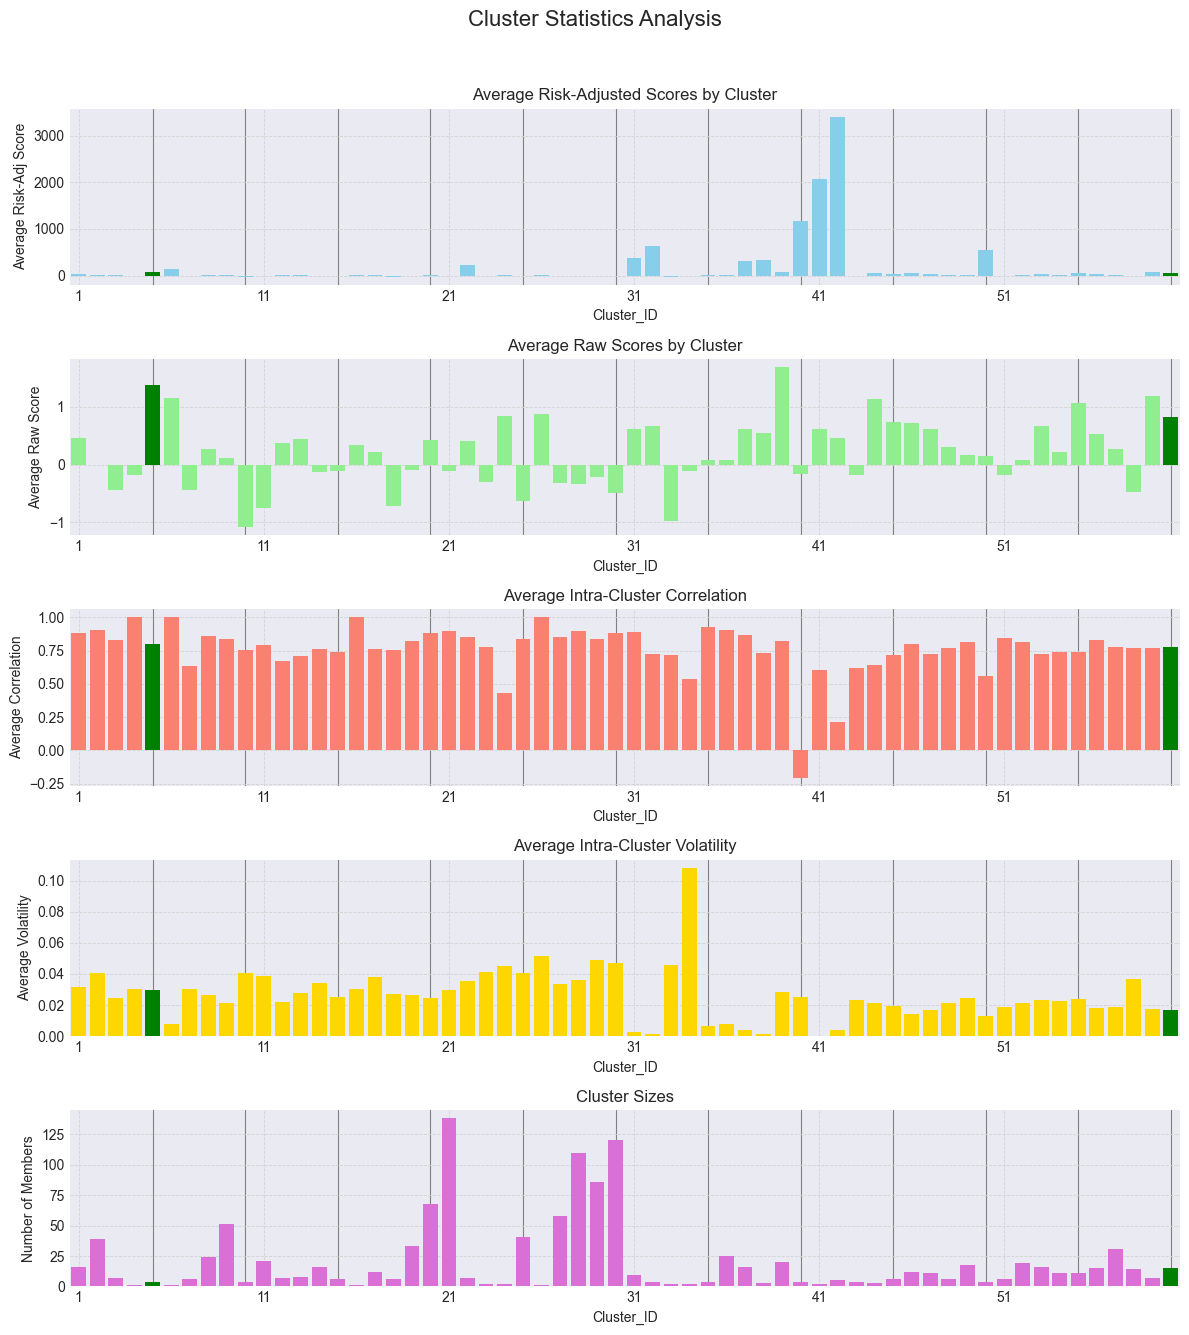

In [74]:
selected_stocks = output['selected_stocks']
# selected_stocks = output['selected_stocks']
selected_cluster_ids = selected_stocks['Cluster_ID'].unique()

plot_cluster_statistics(cluster_stats_df, selected_cluster_ids, highlight_color='green', figsize=(12, 14))

# You can also change the highlight color or figure size:
# plot_cluster_statistics(cluster_stats_df, final_cluster_ids, highlight_color='red', figsize=(10, 14))

In [75]:
print_stock_selection_report(output)


=== CLUSTER SELECTION CRITERIA ===
* Using Composite_Cluster_Score (balancing Raw Score and diversification) for cluster ranking.
* Using Risk_Adj_Score for stock selection within clusters.
* Selected top 10 clusters from N/A total initial clusters.
* Selection Criteria:
    date_str: 2025-04-17
    select_top_n_clusters: 10
    max_selection_per_cluster: 2
    min_cluster_size: 3
    min_raw_score: 2.0
    min_risk_adj_score: 100.0
    penalty_IntraCluster_Corr: 0

=== SELECTED CLUSTERS (RANKED BY COMPOSITE SCORE) ===
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_IntraCluster_Corr  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         39    20         1.6891             68.6814                 0.8221          0.0282                   1.6891                0                         0.1779
          5     4         1.3785             66.6239                 0.8010          0.0295                   1.3785                2           